### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import random
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Embedding,Dense,Dropout

In [2]:
for dirname, _, filenames in os.walk('Speeches'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Speeches\BattleCreekDec19_2019.txt
Speeches\BemidjiSep18_2020.txt
Speeches\CharlestonFeb28_2020.txt
Speeches\CharlotteMar2_2020.txt
Speeches\CincinnatiAug1_2019.txt
Speeches\ColoradorSpringsFeb20_2020.txt
Speeches\DallasOct17_2019.txt
Speeches\DesMoinesJan30_2020.txt
Speeches\FayettevilleSep19_2020.txt
Speeches\FayettevilleSep9_2019.txt
Speeches\FreelandSep10_2020.txt
Speeches\GreenvilleJul17_2019.txt
Speeches\HendersonSep13_2020.txt
Speeches\HersheyDec10_2019.txt
Speeches\LasVegasFeb21_2020.txt
Speeches\LatrobeSep3_2020.txt
Speeches\LexingtonNov4_2019.txt
Speeches\MilwaukeeJan14_2020.txt
Speeches\MindenSep12_2020.txt
Speeches\MinneapolisOct10_2019.txt
Speeches\MosineeSep17_2020.txt
Speeches\NewHampshireAug15_2019.txt
Speeches\NewHampshireAug28_2020.txt
Speeches\NewHampshireFeb10_2020.txt
Speeches\NewMexicoSep16_2019.txt
Speeches\OhioSep21_2020.txt
Speeches\PhoenixFeb19_2020.txt
Speeches\PittsburghSep22_2020.txt
Speeches\TexasSep23_2019.txt
Speeches\ToledoJan9_2020.txt
Speeches\TulsaJu

In [3]:
files_list = glob.glob('Speeches/*.txt')
files_list

['Speeches\\BattleCreekDec19_2019.txt',
 'Speeches\\BemidjiSep18_2020.txt',
 'Speeches\\CharlestonFeb28_2020.txt',
 'Speeches\\CharlotteMar2_2020.txt',
 'Speeches\\CincinnatiAug1_2019.txt',
 'Speeches\\ColoradorSpringsFeb20_2020.txt',
 'Speeches\\DallasOct17_2019.txt',
 'Speeches\\DesMoinesJan30_2020.txt',
 'Speeches\\FayettevilleSep19_2020.txt',
 'Speeches\\FayettevilleSep9_2019.txt',
 'Speeches\\FreelandSep10_2020.txt',
 'Speeches\\GreenvilleJul17_2019.txt',
 'Speeches\\HendersonSep13_2020.txt',
 'Speeches\\HersheyDec10_2019.txt',
 'Speeches\\LasVegasFeb21_2020.txt',
 'Speeches\\LatrobeSep3_2020.txt',
 'Speeches\\LexingtonNov4_2019.txt',
 'Speeches\\MilwaukeeJan14_2020.txt',
 'Speeches\\MindenSep12_2020.txt',
 'Speeches\\MinneapolisOct10_2019.txt',
 'Speeches\\MosineeSep17_2020.txt',
 'Speeches\\NewHampshireAug15_2019.txt',
 'Speeches\\NewHampshireAug28_2020.txt',
 'Speeches\\NewHampshireFeb10_2020.txt',
 'Speeches\\NewMexicoSep16_2019.txt',
 'Speeches\\OhioSep21_2020.txt',
 'Speeche

In [4]:
text = []
for file in files_list:
    with open(file, 'r', encoding='utf-8') as file:
        text.append(file.read())
text[0][:100]

"Thank you. Thank you. Thank you to Vice President Pence. He's a good guy. We've done a great job tog"

### Preprocessing

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

word_text = tokenizer.word_index

idx_text = tokenizer.index_word

word_count = tokenizer.word_counts

total_text = len(word_count)
total_text

9176

In [6]:
sequences = tokenizer.texts_to_sequences(text)
sequences[0][:5]

[67, 5, 67, 5, 67]

In [7]:
features = []
labels = []

for seq in sequences:
    for i in range(500):
        extract = seq[i:i+20]
        features.append(extract[:-1])
        labels.append(extract[-1])

In [8]:
features, labels = shuffle(features, labels, random_state=420)

train_len = int(len(labels)*0.80)

train_features = features[:train_len]
train_labels = labels[:train_len]

test_features = features[train_len:]
test_labels = labels[train_len:]

X_train = np.array(train_features)
X_test = np.array(test_features)

y_train = np.zeros((len(train_labels), total_text), dtype=np.int8)
y_test = np.zeros((len(test_labels), total_text), dtype=np.int8)

for example_index, word_index in enumerate(train_labels):
    y_train[example_index, word_index] = 1
for example_index, word_index in enumerate(test_labels):
    y_test[example_index, word_index] = 1


In [9]:
print("Input:",' '.join([idx_text[i] for i in X_train[1]]))
print("Label:",' '.join([idx_text[train_labels[1]]]))

Input: been a problem it's called houston strong prime minister modi and i have come to houston to celebrate everything
Label: that


### Building Model

In [12]:
model = Sequential()

model.add(Embedding(input_dim=total_text, output_dim=100, trainable=True))
model.add(LSTM(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1, activation='tanh'))
model.add(LSTM(128, return_sequences=False, dropout=0.1, recurrent_dropout=0.1, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(total_text, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         917600    
                                                                 
 lstm_4 (LSTM)               (None, None, 128)         117248    
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 9176)              596440    
                                                                 
Total params: 1,771,128
Trainable params: 1,771,128
No

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(x=X_train, y=y_train, epochs=500, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/500
110/110 [==============================] - 14s 100ms/step - loss: 7.0861 - accuracy: 0.0284 - val_loss: 6.3725 - val_accuracy: 0.0317
Epoch 2/500
110/110 [==============================] - 11s 101ms/step - loss: 6.2812 - accuracy: 0.0393 - val_loss: 6.3458 - val_accuracy: 0.0466
Epoch 3/500
110/110 [==============================] - 12s 107ms/step - loss: 6.2124 - accuracy: 0.0404 - val_loss: 6.3877 - val_accuracy: 0.0466
Epoch 4/500
110/110 [==============================] - 11s 101ms/step - loss: 6.1835 - accuracy: 0.0398 - val_loss: 6.3603 - val_accuracy: 0.0466
Epoch 5/500
110/110 [==============================] - 13s 119ms/step - loss: 6.1650 - accuracy: 0.0403 - val_loss: 6.3689 - val_accuracy: 0.0466
Epoch 6/500
110/110 [==============================] - 15s 134ms/step - loss: 6.1141 - accuracy: 0.0404 - val_loss: 6.2869 - val_accuracy: 0.0466
Epoch 7/500
110/110 [==============================] - 13s 116ms/step - loss: 6.0146 - accuracy: 0.0390 - val_loss: 6.3292 -

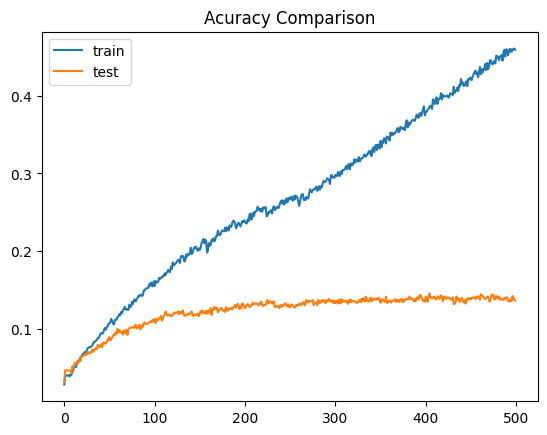

In [15]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.title("Acuracy Comparison")
plt.legend()
plt.show()

### Predicting Text

In [16]:
np.random.seed(420)
seed = 20
new = 20

rand_seq = random.choice(sequences)

start_idx = random.randint(0, len(rand_seq) - seed - 5)

end_idx = start_idx+seed

sent = rand_seq[start_idx: end_idx]
original_sent = [idx_text[i] for i in sent]
actual = sent[:] + rand_seq[end_idx:end_idx+new]

generated = sent[:]
for i in range(new):
    pred = np.argmax(model.predict(np.array(sent).reshape(1,-1)), axis=-1)
    new_idx = np.max(pred)
    sent+=[new_idx]
    generated.append(new_idx)

print('Original Sentence: ', ' '.join(original_sent), '\n')
print('Actual Sentence: ', ' '.join([idx_text[i] for i in actual]), '\n')
print('Generated Sentence: ', ' '.join([idx_text[i] for i in generated]))

1/1 [==============================] - 0s 21ms/step
Original Sentence:  anyway because they don't want to go away from what they're doing which is crazy because it is they're doing 

Actual Sentence:  anyway because they don't want to go away from what they're doing which is crazy because it is they're doing very poorly while the social and socialist democrats are trying to destroy american healthcare and your social security they're putting 

Generated Sentence:  anyway because they don't want to go away from what they're doing which is crazy because it is they're doing all too many right and they're not getting all great people that again and we have a lot of doesn't
